In [40]:
%%javascript

window.load_remote_theme = false;
var theme_url = "https://drostehk.github.io/ipynb-theme/";
var asset_url = 'https://raw.githubusercontent.com/tijptjik/DS_assets/master/';

window.load_local_theme = function(){
    var hostname = document.location.hostname;
    return ((hostname == "localhost" || hostname == '127.0.0.1') && !load_remote_theme);
}

var url = load_local_theme() ? document.location.origin + "/files/theme/custom.js" : theme_url + 'custom.js'

$.getScript(url)

<IPython.core.display.Javascript object>

# Showcase : Python for Data Science

Data Science means using _input_ variables to predict _output_ variables. That's it. But that's easier said than done …

In [41]:
import pandas as pd

# Styles for table output
css = 'table table-hover table-striped'
style = lambda self: self.to_html(classes=css)
pd.DataFrame._repr_html_ = style

### Learning $f(X)$

In [42]:
features = ['TV','Radio','Newspaper','Sales']
advertising = pd.read_csv("Advertising.csv")[features]
advertising.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


How can we best predict Sales from the TV, Radio and Newspaper advertising budgets? (Why would we want to?)

Let $Y$ be the output variable (e.g. sales), and $X$ the vector of input variables $X1,X2,X3,\ldots$, then

$$ Y = f(X)+\epsilon$$

We want to work out what $f$ is. $\epsilon$ is unavoidable noise that is independent of $X$.

How do we estimate $f$ from the data, and how do we evaluate our estimate? That is the challenge of _Data Science_.

## Why Python?

### Top Python Advantages

- **Instant feedback** ~ from the interactive interpreter.
- **Non-intrusive** ~ You think about the problem, not the tool you are working with. After you learn Python, it gets out of the way.
- **Community** ~ The community is a great source of examples and ideas.
- The philosophy of **one-best-way** means that Python programmers all tend to do things in sort of the same way. This is a big advantage because it makes it easy to read other people's code - a great way to learn.
- **Libraries** ~ Whatever you want to do, somebody has written code to help you get there.

### Top Python Disadvantages

- **No single source of truth / best-practices** ~ It can be hard to learn what is the best library for a particular job. The large number of packages relevant to a particular task can make it difficult to find the one best suited to your exact needs.
- **Official Documentation is lacking** ~ The Python official documentation is seldom the best way to learn a new library. The informal Python community provides the most useful examples. Yet sorting out the wheat from the chaff can be hit-or-miss.
- **Concurrency** ~ Python was designed without concurrency in mind and it shows.

## Types of problems where $f(X)$ needs to be found

* Estimation
* Classification
* Bayesian Stochastic Modelling
* Optimization
* Computer Vision

## Python tools for finding $f(X)$

In [43]:
from IPython.lib.display import IFrame

### Regression

![](http://statsmodels.sourceforge.net/ipdirective/_static/statsmodels_hybi_banner.png)

#### statsmodels

Statsmodels is a Python module that allows users to explore data, estimate statistical models, and perform statistical tests. An extensive list of descriptive statistics, statistical tests, plotting functions, and result statistics are available for different types of data and each estimator. Researchers across fields may find that statsmodels fully meets their needs for statistical computing and data analysis in Python

#### Example : Determining the effect of Advertising spend

The multiple regression model describes the response as a weighted sum of the predictors:

$$Sales=β0+β1×TV+β2×Radio$$

![](assets/ad.png)

In [44]:
import statsmodels.api as sm

X = advertising[['TV', 'Radio']]
y = advertising['Sales']

## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 25 Mar 2015   Prob (F-statistic):           4.83e-98
Time:                        11:51:15   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.000         2.340     3.502
TV             0.0458      0.001     32.909      0.000         0.043     0.048
Radio          0.1880      0.008     23.382      0.000         0.172     0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Classification

![](http://radimrehurek.com/data_science_python/drop_shadows_background.png)

#### Sci-Kit Learn

Scikit-learn is a Python module integrating a wide range of state-of-the-art machine learning algorithms for medium-scale supervised and unsupervised problems. This package focuses on bringing machine learning to non-specialists using a general-purpose high-level language. Emphasis is put on ease of use, performance, documentation, and API consistency. It has minimal dependencies and is distributed under the simplified BSD license, encouraging its use in both academic and commercial settings. 

#### Example : Predicting Flowers

In [45]:
iris = sns.load_dataset("iris")

g = sns.PairGrid(iris, hue="species")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

NameError: name 'sns' is not defined

In [46]:
# k-Nearest Neighbor
from sklearn import datasets
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
# load iris the datasets
dataset = datasets.load_iris()
# fit a k-nearest neighbor model to the data
model = KNeighborsClassifier()
model.fit(dataset.data, dataset.target)
print(model)
# make predictions
expected = dataset.target
predicted = model.predict(dataset.data)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform')
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.96      0.94      0.95        50
          2       0.94      0.96      0.95        50

avg / total       0.97      0.97      0.97       150

[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]


In [47]:
# Gaussian Naive Bayes
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
# load the iris datasets
dataset = datasets.load_iris()
# fit a Naive Bayes model to the data
model = GaussianNB()
model.fit(dataset.data, dataset.target)
print(model)
# make predictions
expected = dataset.target
predicted = model.predict(dataset.data)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

GaussianNB()
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.94      0.94      0.94        50
          2       0.94      0.94      0.94        50

avg / total       0.96      0.96      0.96       150

[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


In [48]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
# load the iris datasets
dataset = datasets.load_iris()
# fit a CART model to the data
model = DecisionTreeClassifier()
model.fit(dataset.data, dataset.target)
print(model)
# make predictions
expected = dataset.target
predicted = model.predict(dataset.data)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

DecisionTreeClassifier(compute_importances=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_density=None, min_samples_leaf=1, min_samples_split=2,
            random_state=None, splitter='best')
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       1.00      1.00      1.00        50
          2       1.00      1.00      1.00        50

avg / total       1.00      1.00      1.00       150

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


#### Example : Synthetic Datasets

A comparison of a several classifiers in scikit-learn on synthetic datasets. The point of this example is to illustrate the nature of decision boundaries of different classifiers. This should be taken with a grain of salt, as the intuition conveyed by these examples does not necessarily carry over to real datasets.

Particularly in high-dimensional spaces, data can more easily be separated linearly and the simplicity of classifiers such as naive Bayes and linear SVMs might lead to better generalization than is achieved by other classifiers.

The plots show training points in solid colors and testing points semi-transparent. The lower right shows the classification accuracy on the test set.

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.lda import LDA
from sklearn.qda import QDA

In [50]:
h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree",
         "Random Forest", "AdaBoost", "Naive Bayes", "LDA", "QDA"]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    LDA(),
    QDA()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds in datasets:
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()

### Bayesian Stochastic Modelling

![](http://upload.wikimedia.org/wikipedia/commons/4/43/HMMGraph.svg)

#### PyMC

PyMC is a python module that implements Bayesian statistical models and fitting algorithms, including Markov chain Monte Carlo. Its flexibility and extensibility make it applicable to a large suite of problems. Along with core sampling functionality, PyMC includes methods for summarizing output, plotting, goodness-of-fit and convergence diagnostics.

![](https://healthyalgorithms.files.wordpress.com/2014/12/t0aee.png)

#### Example: Monitoring Rate Changes

You are given a series of daily text-message counts from a user of your system. The data, plotted over time, appears in the chart below. You are curious to know if the user's text-messaging habits have changed over time, either gradually or suddenly. How can you model this? 

In [51]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
figsize(11, 9)

import scipy.stats as stats

In [52]:
figsize(12.5, 3.5)
count_data = np.loadtxt("txtdata.csv")
n_count_data = len(count_data)

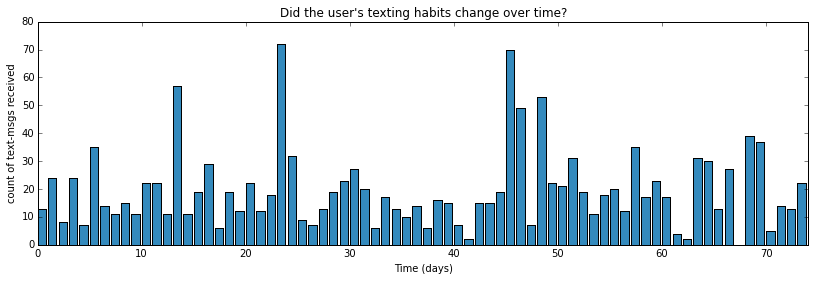

In [53]:
plt.bar(np.arange(n_count_data), count_data, color="#348ABD")
plt.xlabel("Time (days)")
plt.ylabel("count of text-msgs received")
plt.title("Did the user's texting habits change over time?")
plt.xlim(0, n_count_data);
plt.gcf().set_size_inches(13.8,4)

In [54]:
import pymc as pm

alpha = 1.0 / count_data.mean()  # Recall count_data is the
                                 # variable that holds our txt counts
lambda_1 = pm.Exponential("lambda_1", alpha)
lambda_2 = pm.Exponential("lambda_2", alpha)

tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data)

In [55]:
@pm.deterministic
def lambda_(tau=tau, lambda_1=lambda_1, lambda_2=lambda_2):
    out = np.zeros(n_count_data)
    out[:tau] = lambda_1  # lambda before tau is lambda1
    out[tau:] = lambda_2  # lambda after (and including) tau is lambda2
    return out

In [56]:
observation = pm.Poisson("obs", lambda_, value=count_data, observed=True)

model = pm.Model([observation, lambda_1, lambda_2, tau])

In [57]:
mcmc = pm.MCMC(model)
mcmc.sample(40000, 10000, 1)

 [-----------------100%-----------------] 40000 of 40000 complete in 6.6 sec

In [58]:
lambda_1_samples = mcmc.trace('lambda_1')[:]
lambda_2_samples = mcmc.trace('lambda_2')[:]
tau_samples = mcmc.trace('tau')[:]

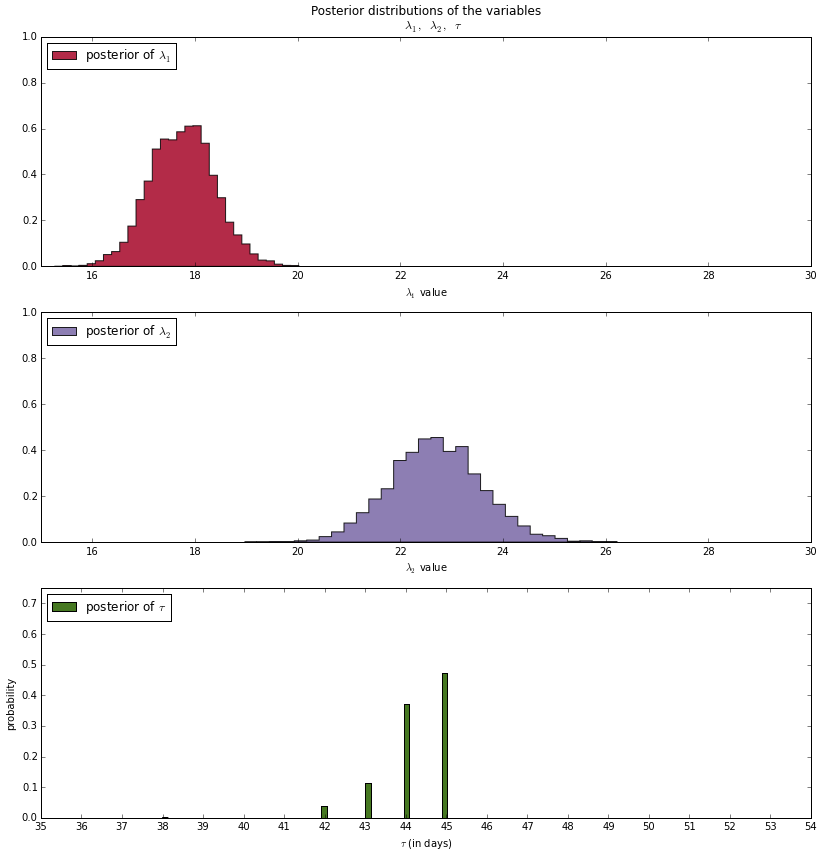

In [59]:
figsize(12.5, 10)
# histogram of the samples:

ax = plt.subplot(311)
ax.set_autoscaley_on(False)

plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_1$", color="#A60628", normed=True)
plt.legend(loc="upper left")
plt.title(r"""Posterior distributions of the variables
    $\lambda_1,\;\lambda_2,\;\tau$""")
plt.xlim([15, 30])
plt.xlabel("$\lambda_1$ value")

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_2$", color="#7A68A6", normed=True)
plt.legend(loc="upper left")
plt.xlim([15, 30])
plt.xlabel("$\lambda_2$ value")

plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_count_data, alpha=1,
         label=r"posterior of $\tau$",
         color="#467821", weights=w, rwidth=2.)
plt.xticks(np.arange(n_count_data))

plt.legend(loc="upper left")
plt.ylim([0, .75])
plt.xlim([35, len(count_data) - 20])
plt.xlabel(r"$\tau$ (in days)")
plt.ylabel("probability");
plt.gcf().set_size_inches(13.8,14)

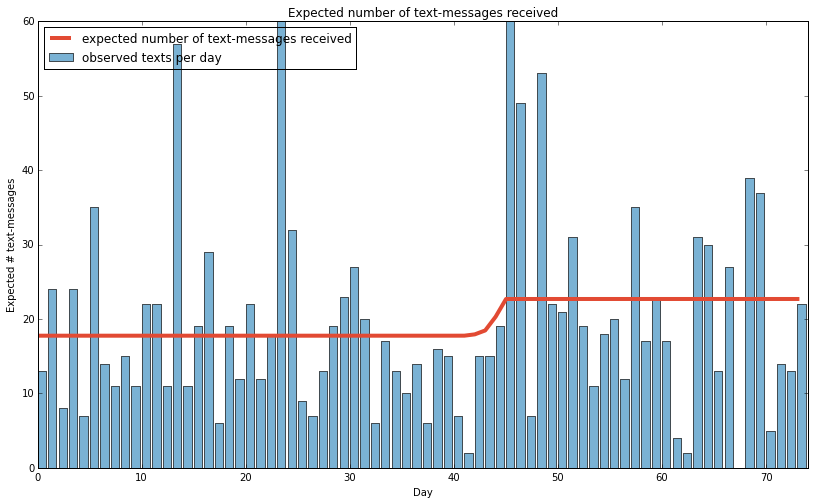

In [60]:
figsize(12.5, 5)
# tau_samples, lambda_1_samples, lambda_2_samples contain
# N samples from the corresponding posterior distribution
N = tau_samples.shape[0]
expected_texts_per_day = np.zeros(n_count_data)
for day in range(0, n_count_data):
    # ix is a bool index of all tau samples corresponding to
    # the switchpoint occurring prior to value of 'day'
    ix = day < tau_samples
    # Each posterior sample corresponds to a value for tau.
    # for each day, that value of tau indicates whether we're "before"
    # (in the lambda1 "regime") or
    #  "after" (in the lambda2 "regime") the switchpoint.
    # by taking the posterior sample of lambda1/2 accordingly, we can average
    # over all samples to get an expected value for lambda on that day.
    # As explained, the "message count" random variable is Poisson distributed,
    # and therefore lambda (the poisson parameter) is the expected value of
    # "message count".
    expected_texts_per_day[day] = (lambda_1_samples[ix].sum()
                                   + lambda_2_samples[~ix].sum()) / N


plt.plot(range(n_count_data), expected_texts_per_day, lw=4, color="#E24A33",
         label="expected number of text-messages received")
plt.xlim(0, n_count_data)
plt.xlabel("Day")
plt.ylabel("Expected # text-messages")
plt.title("Expected number of text-messages received")
plt.ylim(0, 60)
plt.bar(np.arange(len(count_data)), count_data, color="#348ABD", alpha=0.65,
        label="observed texts per day")

plt.legend(loc="upper left");
plt.gcf().set_size_inches(13.8,8)

### Optimization Problems

![](http://deap.gel.ulaval.ca/doc/default/_images/deap_long.png)

#### DEAP

Distributed Evolutionary Algorithms in Python (DEAP) is an evolutionary computation framework for rapid prototyping and testing of ideas. It incorporates the data structures and tools required to implement most common evolutionary computation techniques such as genetic algorithm, genetic programming, evolution strategies, particle swarm optimization, differential evolution and estimation of distribution algorithm.

#### Example : Traveling Salesman

Given a set of cities, and the distances between each pair of cities, find a tour of the cities with the minimum total distance. A tour means you start at one city, visit every other city exactly once, and then return to the starting city.

### The *vocabulary* of the problem:

- **City**: For the purpose of this exercise, a city is "atomic" in the sense that we don't have to know anything about the components or attributes of a city, just how far it is from other cities.
- **Cities**: We will need to represent a set of cities; Python's `set` datatype might be appropriate for that.
- **Distance**: We will need the distance between two cities.  If `A` and `B` are cities. This could be done with a function, `distance(A, B)`, or with a dict, `distance[A][B]` or `distance[A, B]`, or with an array if `A` and `B` are integer indexes.  The resulting distance will be a real number (which Python calls a `float`).
- **Tour**: A tour is an ordered list of cities; Python's `list` or `tuple` datatypes would work.
- **Total distance**: The sum of the distances of adjacent cities in the tour.  We will probably have a function, `total_distance(tour)`.

In [61]:
def exact_TSP(cities):
    "Generate all possible tours of the cities and choose the shortest one."
    return shortest(alltours(cities))

def shortest(tours): 
    "Return the tour with the minimum total distance."
    return min(tours, key=total_distance)

### Representing Tours

In [62]:
import itertools

alltours = itertools.permutations # The permutation function is already defined in the itertools module
cities = {1, 2, 3}
list(alltours(cities))

[(1, 2, 3), (1, 3, 2), (2, 1, 3), (2, 3, 1), (3, 1, 2), (3, 2, 1)]

### Representing Cities and Distance

In [63]:
def total_distance(tour):
    "The total distance between each pair of consecutive cities in the tour."
    return sum(distance(tour[i], tour[i-1]) 
               for i in range(len(tour)))

In [64]:
City = complex # Constructor for new cities, e.g. City(300, 400)

In [65]:
def distance(A, B): 
    "The Euclidean distance between two cities."
    return abs(A - B)

In [66]:
A = City(300, 0)
B = City(0, 400)
distance(A, B)

500.0

In [67]:
def generate_cities(n):
    "Make a set of n cities, each with random coordinates."
    return set(City(random.randrange(10, 890), 
                    random.randrange(10, 590)) 
               for c in range(n))

A cool thing is to be able to plot a tour

In [68]:
def plot_tour(tour, alpha=1, color=None):
    # Plot the tour as blue lines between blue circles, and the starting city as a red square.
    plotline(list(tour) + [tour[0]], alpha=alpha, color=color)
    plotline([tour[0]], 'rs', alpha=alpha)
    # plt.show()
    
def plotline(points, style='bo-', alpha=1, color=None):
    "Plot a list of points (complex numbers) in the 2-D plane."
    X, Y = XY(points)
    
    if color:
        plt.plot(X, Y, style, alpha=alpha, color=color)
    else:
        plt.plot(X, Y, style, alpha=alpha)
    
def XY(points):
    "Given a list of points, return two lists: X coordinates, and Y coordinates."
    return [p.real for p in points], [p.imag for p in points]

In [70]:
import random
cities8, cities10, cities50, cities100 = generate_cities(8), generate_cities(10), generate_cities(50), generate_cities(100)
cities8

{(257+405j),
 (452+351j),
 (870+500j),
 (755+285j),
 (265+278j),
 (204+67j),
 (96+201j),
 (715+465j)}

In [71]:
tour = exact_TSP(cities8)

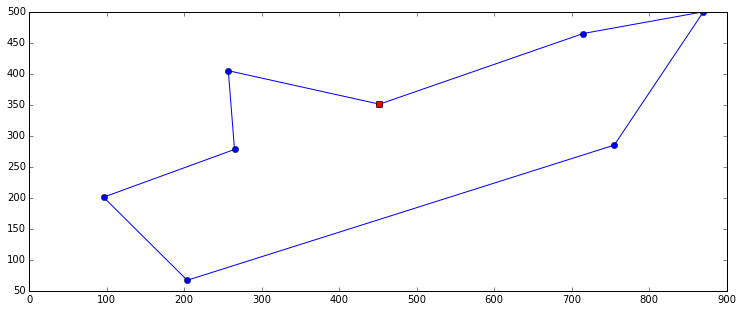

In [72]:
plot_tour(tour)

In [73]:
%timeit exact_TSP(cities8)

1 loops, best of 3: 171 ms per loop


In [75]:
from deap import algorithms, base, creator, tools

In [76]:
num_cities = 30
cities = generate_cities(num_cities)

In [77]:
cities

{(364+498j),
 (742+373j),
 (236+180j),
 (335+401j),
 (626+119j),
 (80+152j),
 (363+337j),
 (58+567j),
 (86+238j),
 (564+419j),
 (566+340j),
 (880+108j),
 (589+376j),
 (691+420j),
 (686+346j),
 (80+399j),
 (89+227j),
 (333+573j),
 (668+337j),
 (346+489j),
 (585+476j),
 (702+480j),
 (304+230j),
 (214+69j),
 (653+393j),
 (110+42j),
 (33+112j),
 (277+95j),
 (887+554j),
 (381+470j)}

In [220]:
toolbox = base.Toolbox()

### Individual representation and evaluation
* Individuals represent possible solutions to the problem.
* In the TSP case, it looks like the tour itself can be a suitable representation.
* For simplicity, an individual can be a list with the indexes corresponding to each city.
* This will simplify the crossover and mutation operators.
* We can rely on the `total_distance()` function for evaluation and set the fitness assignment as to minimize it.

In [221]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

Let's now define that our individuals are composed by indexes that referr to elements of cities and, correspondingly, the population is composed by individuals.

In [222]:
toolbox.register("indices", numpy.random.permutation, len(cities))
toolbox.register("individual", tools.initIterate, creator.Individual,
                 toolbox.indices)
toolbox.register("population", tools.initRepeat, list, 
                 toolbox.individual)

Defining the crossover and mutation operators can be a challenging task.

There are  various <a href='http://en.wikipedia.org/wiki/Crossover_(genetic_algorithm)#Crossover_for_Ordered_Chromosomes'>crossover operators</a> that have been devised to deal with ordered individuals like ours.

- We will be using DEAP's `deap.tools.cxOrdered()` crossover.
- For mutation we will swap elements from two points of the individual.
- This is performed by `deap.tools.mutShuffleIndexes()`.

In [223]:
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)

Evaluation can be easily defined from the `total_distance()` definition.

In [225]:
def create_tour(individual):
    return [list(cities)[e] for e in individual]

In [226]:
def evaluation(individual):
    '''Evaluates an individual by converting it into 
    a list of cities and passing that list to total_distance'''
    return (total_distance(create_tour(individual)),)

In [227]:
toolbox.register("evaluate", evaluation)

We will employ tournament selection with size 3.

In [228]:
toolbox.register("select", tools.selTournament, tournsize=3)

Lets' run the algorithm with a population of 100 individuals and 400 generations.

In [233]:
pop = toolbox.population(n=100)

In [234]:
%%time 
result, log = algorithms.eaSimple(pop, toolbox,
                             cxpb=0.8, mutpb=0.2,
                             ngen=400, verbose=False)

CPU times: user 7.58 s, sys: 160 ms, total: 7.74 s
Wall time: 7.58 s


### We can now review the results

The best individual of the last population:

In [235]:
best_individual = tools.selBest(result, k=1)[0]
print('Fitness of the best individual: ', evaluation(best_individual)[0])

('Fitness of the best individual: ', 3612.245076116959)


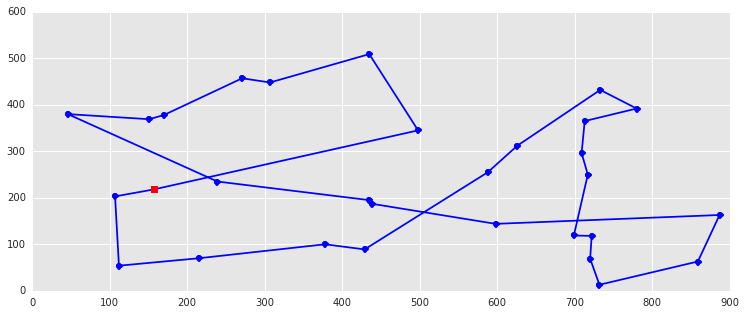

In [236]:
plot_tour(create_tour(best_individual))

### Image Recognition

![](http://sklearn-theano.github.io/images/plot_mnist_generator_001.png)

#### Theano

Theano is a Python library that allows you to define, optimize, and evaluate mathematical expressions involving multi-dimensional arrays efficiently.

#### Example : Digit Recognition

In [ ]:
import numpy as np
import time
from sklearn_theano.datasets import fetch_mnist_generated

X = fetch_mnist_generated(n_samples=1600, random_state=1999)

# plotting based on
# http://stackoverflow.com/questions/4098131/matplotlib-update-a-plot
num_updates = len(X) // 16
f, axarr = plt.subplots(4, 4)
objarr = np.empty_like(axarr)
for n, ax in enumerate(axarr.flat):
    objarr.flat[n] = ax.imshow(X[n], cmap='gray', interpolation='nearest')
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
plt.show(block=False)

for i in range(num_updates):
    for n, obj in enumerate(objarr.flat):
        obj.set_data(X[i * len(objarr.flat) + n])
    plt.draw()
    time.sleep(.08)
    if (i % 20) == 0:
        print("Iteration %i" % i)
plt.show()

![](assets/theano.png)

## Python Data Ecosystem

* Data Wrangling
* Formulae
* Distributed Computing
* Distributed Data
* Data Science Pipeline
* Plotting
* Interactive Graphics

### Data Wrangling

#### pandas

Python has long been great for data munging and preparation, but less so for data analysis and modeling. pandas helps fill this gap, enabling you to carry out your entire data analysis workflow in Python without having to switch to a more domain specific language like R.

Combined with the excellent IPython toolkit and other libraries, the environment for doing data analysis in Python excels in performance, productivity, and the ability to collaborate.

#### Example : Time Series

In [45]:
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import pandas.io.data as web

In [46]:
# Read the data
yhoo = web.DataReader("yhoo", "yahoo", datetime.datetime(2007, 1, 1), 
    datetime.datetime(2012,1,1))

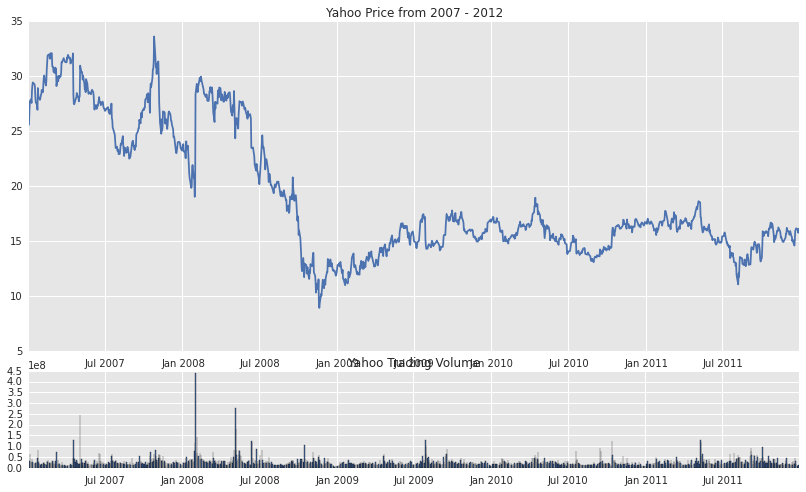

In [144]:
# Plot stock price and volume
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
top.plot(yhoo.index, yhoo["Close"])
plt.title('Yahoo Price from 2007 - 2012')

bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom.bar(yhoo.index, yhoo['Volume'])
plt.title('Yahoo Trading Volume')

plt.gcf().set_size_inches(13.8,8)

In [48]:
# Calculate moving averages
mavg = yhoo['30_MA_Open'] = pd.stats.moments.rolling_mean(yhoo['Open'], 30)
yhoo['30_MA_Open'].tail() 

Date
2011-12-23    15.593000
2011-12-27    15.599667
2011-12-28    15.595000
2011-12-29    15.595667
2011-12-30    15.608333
Name: 30_MA_Open, dtype: float64

In [49]:
# Look at selected rows
yhoo[160:165]

,Open,High,Low,Close,Volume,Adj Close,30_MA_Open
Date,,,,,,,
2007-08-22,23.22,23.52,23.18,23.23,18763700,23.23,24.354000
2007-08-23,23.35,23.36,22.95,23.13,15603000,23.13,24.242333
2007-08-24,23.03,23.73,23.03,23.59,11191100,23.59,24.114333
2007-08-27,23.59,23.76,23.01,23.03,16523800,23.03,24.018000
2007-08-28,22.95,23.10,22.50,22.52,18030600,22.52,23.891667


In [50]:
# Index into a particular date
yhoo.ix['2010-01-04']

Open                16.940000
High                17.200000
Low                 16.880000
Close               17.100000
Volume        16587400.000000
Adj Close           17.100000
30_MA_Open          15.806333
Name: 2010-01-04 00:00:00, dtype: float64

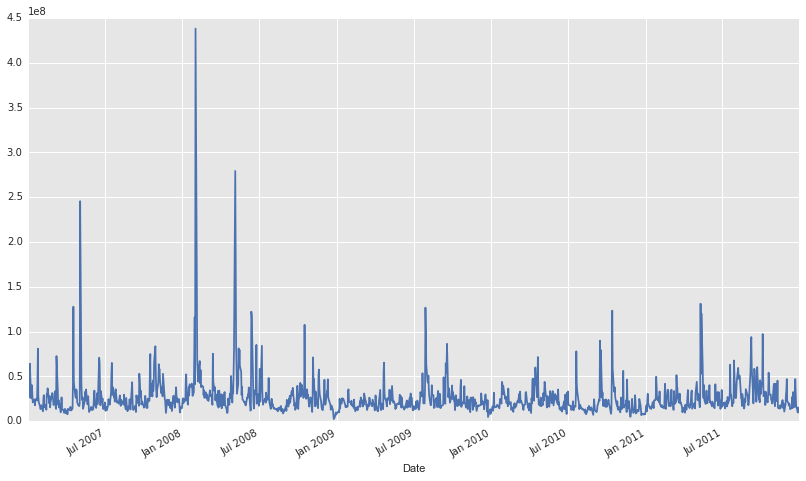

In [145]:
# Look at volume for the time period
yhoo.Volume.plot()
plt.gcf().set_size_inches(13.8,8)

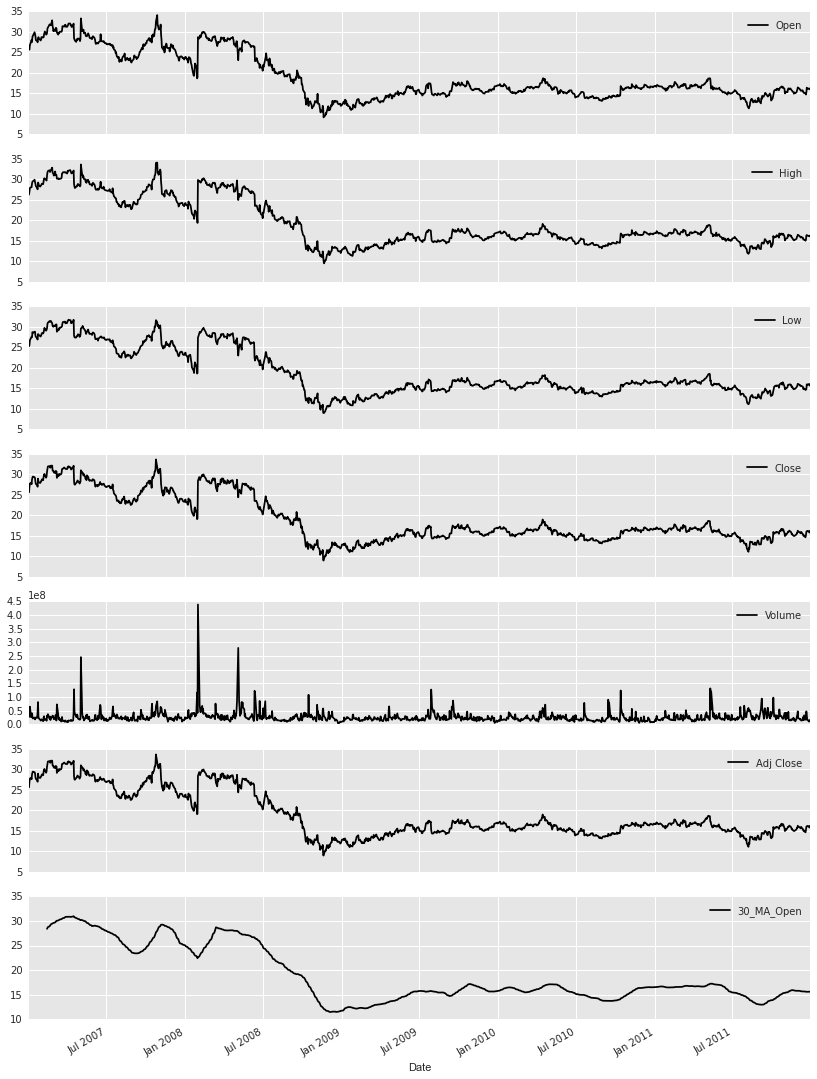

In [132]:
# More plots
yhoo.plot(subplots = True, figsize = (8, 8));
plt.legend(loc = 'best')
plt.gcf().set_size_inches(14,20)

In [53]:
close_px = yhoo['Adj Close']
mavg = pd.rolling_mean(close_px, 30)

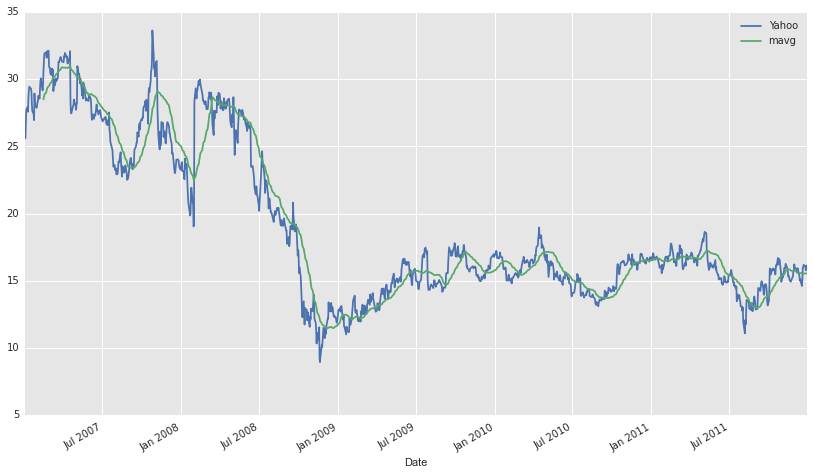

In [133]:
# Moving average plot
yhoo.Close.plot(label='Yahoo')
mavg.plot(label='mavg')
plt.legend()
plt.gcf().set_size_inches(14,8)

### Formulae

#### Patsy

patsy is a Python package for describing statistical models (especially linear models, or models that have a linear component) and building design matrices. It is closely inspired by and compatible with the formula mini-language used in R and S.

#### Example : Defining a Linear Model

In [88]:
import numpy as np
from patsy import dmatrices, dmatrix, demo_data
data = demo_data("a", "b", "x1", "x2", "y", "z column")

`demo_data()` gives us a mix of categorical and numerical variables:

In [89]:
data

{'a': ['a1', 'a1', 'a2', 'a2', 'a1', 'a1', 'a2', 'a2'],
 'b': ['b1', 'b2', 'b1', 'b2', 'b1', 'b2', 'b1', 'b2'],
 'x1': array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
        -0.97727788,  0.95008842, -0.15135721]),
 'x2': array([-0.10321885,  0.4105985 ,  0.14404357,  1.45427351,  0.76103773,
         0.12167502,  0.44386323,  0.33367433]),
 'y': array([ 1.49407907, -0.20515826,  0.3130677 , -0.85409574, -2.55298982,
         0.6536186 ,  0.8644362 , -0.74216502]),
 'z column': array([ 2.26975462, -1.45436567,  0.04575852, -0.18718385,  1.53277921,
         1.46935877,  0.15494743,  0.37816252])}

Of course Patsy doesn’t much care what sort of object you store your data in, so long as it can be indexed like a Python dictionary, `data[varname]`. You may prefer to store your data in a pandas DataFrame, or a numpy record array... whatever makes you happy.

Now, let’s generate design matrices suitable for regressing `y` onto `x1` and `x2`.

In [90]:
dmatrices("y ~ x1 + x2", data)

(DesignMatrix with shape (8, 1)
          y
    1.49408
   -0.20516
    0.31307
   -0.85410
   -2.55299
    0.65362
    0.86444
   -0.74217
   Terms:
     'y' (column 0),
 DesignMatrix with shape (8, 3)
   Intercept        x1        x2
           1   1.76405  -0.10322
           1   0.40016   0.41060
           1   0.97874   0.14404
           1   2.24089   1.45427
           1   1.86756   0.76104
           1  -0.97728   0.12168
           1   0.95009   0.44386
           1  -0.15136   0.33367
   Terms:
     'Intercept' (column 0)
     'x1' (column 1)
     'x2' (column 2))

The return value is a Python tuple containing two DesignMatrix objects, the first representing the left-hand side of our formula, and the second representing the right-hand side. Notice that an intercept term was automatically added to the right-hand side. These are just ordinary numpy arrays with some extra metadata and a fancy __repr__ method attached, so we can pass them directly to a regression function like np.linalg.lstsq():

In [91]:
outcome, predictors = dmatrices("y ~ x1 + x2", data)

In [92]:
betas = np.linalg.lstsq(predictors, outcome)[0].ravel()

In [93]:
for name, beta in zip(predictors.design_info.column_names, betas):
    print("%s: %s" % (name, beta))

Intercept: 0.579662344123
x1: 0.0885991903554
x2: -1.76479205551


If you just want the design matrix alone, without the `y` values, use `dmatrix()` and leave off the `y ~` part at the beginning:

In [94]:
dmatrix("x1 + x2", data)

DesignMatrix with shape (8, 3)
  Intercept        x1        x2
          1   1.76405  -0.10322
          1   0.40016   0.41060
          1   0.97874   0.14404
          1   2.24089   1.45427
          1   1.86756   0.76104
          1  -0.97728   0.12168
          1   0.95009   0.44386
          1  -0.15136   0.33367
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'x2' (column 2)

We can transform variables using arbitrary Python code:

In [95]:
dmatrix("x1 + np.log(x2 + 10)", data)

DesignMatrix with shape (8, 3)
  Intercept        x1  np.log(x2 + 10)
          1   1.76405          2.29221
          1   0.40016          2.34282
          1   0.97874          2.31689
          1   2.24089          2.43836
          1   1.86756          2.37593
          1  -0.97728          2.31468
          1   0.95009          2.34601
          1  -0.15136          2.33541
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'np.log(x2 + 10)' (column 2)

### Distributed Computing

![](http://upload.wikimedia.org/wikipedia/commons/e/ea/Spark-logo-192x100px.png)

#### PySpark

Apache Spark is a great way for performing large-scale data processing. In contrast to Hadoop's two-stage disk-based MapReduce paradigm, Spark's in-memory primitives provide performance up to 100 times faster for certain applications. By allowing user programs to load data into a cluster's memory and query it repeatedly, Spark is well suited to machine learning algorithmsThe Python bindings are provided by PySpark - that's a way of interfacing with Spark through Python.

![](http://image.slidesharecdn.com/hadoopandspark-140415211944-phpapp01/95/hadoop-and-spark-26-638.jpg?cb=1397615021)

In [105]:
# IFrame("//www.slideshare.net/slideshow/embed_code/34051532", 0, 600)

#### Example : WordCount

In [ ]:
import sys
from operator import add

from pyspark import SparkContext


if __name__ == "__main__":
    if len(sys.argv) != 2:
        print >> sys.stderr, "Usage: wordcount <file>"
        exit(-1)
    
    sc = SparkContext(appName="PythonWordCount")
    
    lines = sc.textFile(sys.argv[1], 1)
    
    counts = lines.flatMap(lambda x: x.split(' ')) \
                  .map(lambda x: (x, 1)) \
                  .reduceByKey(add)
    
    output = counts.collect()
    
    for (word, count) in output:
        print "%s: %i" % (word, count)

    sc.stop()

### Distributed Data

![](http://blaze.pydata.org/en/latest/_images/blaze_med.png)

#### Blaze

Blaze is the next generation of NumPy, Python’s extremely popular array library. Blaze aims to extend the structural properties of NumPy arrays to a wider variety of table and array-like structures that support commonly requested features such as missing values, type heterogeneity, and labeled arrays.

Unlike NumPy, Blaze is designed to handle out-of-core computations on large datasets that exceed the system memory capacity, as well as on distributed and streaming data. Blaze is able to operate on datasets transparently as if they behaved like in-memory NumPy arrays.

![](http://continuum.io/media/img/numpy_plus.png)

#### Example : Mixing Data Sources

In [ ]:
a = open('quarter_numbers.hdf')
b = open('sql://measurements')
c = open('mydata3', dshape('10, 10, int32'))
 
e = a + b * c
e.eval()

#### Example : Swapping Out Data BackEnds

In the following example we build an abstract table for accounts in a simple bank. We then describe a query, deadbeats, to find the names of the account holders with a negative balance.


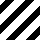
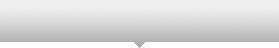
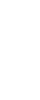
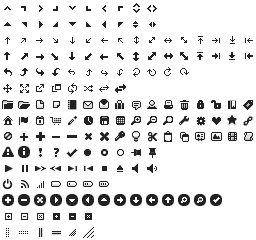
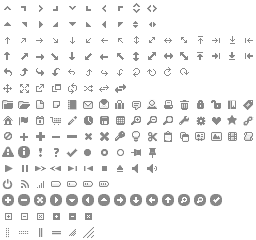
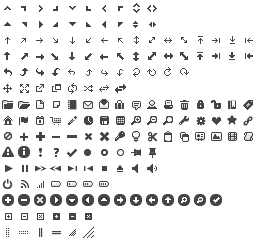
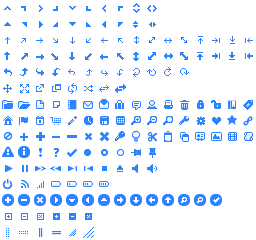
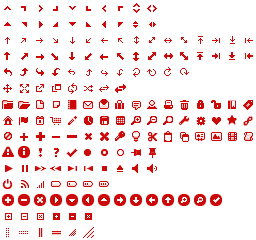
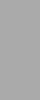
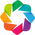
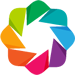
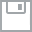
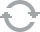
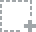
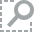
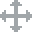
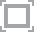
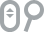

In [107]:
from blaze import TableSymbol, compute
accounts = TableSymbol('accounts', '{id: int, name: string, amount: int}')
 
# The names of account holders with negative balance
deadbeats = accounts[accounts['amount'] < 0]['name']

Programmers familiar with Pandas should find the syntax to create deadbeats familiar. Note that we haven’t actually done any work yet. The table accounts is purely imaginary and so the deadbeats expression is just an expression of intent. The Pandas-like syntax builds up a graph of operations to perform later.

However, if we happen to have some similarly shaped data lying around

In [108]:
L = [[1, 'Alice',   100],
     [2, 'Bob',    -200],
     [3, 'Charlie', 300],
     [4, 'Dennis',  400],
     [5, 'Edith',  -500]]

We can combine our expression, deadbeats with our data L to compute an actual result

In [109]:
compute(deadbeats, L) # an iterator as a result

In [110]:
list(compute(deadbeats, L))

['Bob', 'Edith']

So in its simplest incarnation, Blaze is a way to write down computations abstractly which can later be applied to real data.

Fortunately the deadbeats expression can run against many different kinds of data. We just computed deadbeats against Python lists, here we compute it against a Pandas DataFrame

In [117]:
df = pd.DataFrame([[1, 'Alice',   100],
                [2, 'Bob',    -200],
                [3, 'Charlie', 300],
                [4, 'Dennis',  400],
                [5, 'Edith',  -500]],
               columns=['id', 'name', 'amount'])

In [118]:
compute(deadbeats, df)

1      Bob
4    Edith
Name: name, dtype: object

Note that Blaze didn’t perform the computation here, Pandas did (it’s good at that), Blaze just told Pandas what to do. Blaze doesn’t compute results; Blaze drives other systems to compute results.

In [111]:
import pymongo
db = pymongo.MongoClient().db
db.mycollection.insert([{'id': 1, 'name': 'Alice',   'amount':  100},
                        {'id': 2, 'name': 'Bob',     'amount': -200},
                        {'id': 3, 'name': 'Charlie', 'amount':  300},
                        {'id': 4, 'name': 'Dennis',  'amount':  400},
                        {'id': 5, 'name': 'Edith',   'amount': -500}])

[ObjectId('5511aa2a6903823aedd261c4'),
 ObjectId('5511aa2a6903823aedd261c5'),
 ObjectId('5511aa2a6903823aedd261c6'),
 ObjectId('5511aa2a6903823aedd261c7'),
 ObjectId('5511aa2a6903823aedd261c8')]

In [112]:
compute(deadbeats, db.mycollection)

[u'Bob', u'Edith']

To remind you we created a single Blaze query

In [114]:
accounts = TableSymbol('accounts', '{id: int, name: string, amount: int}')
deadbeats = accounts[accounts['amount'] < 0]['name']

In [115]:
list(compute(deadbeats, L))          # Python

['Bob', 'Edith']

In [119]:
compute(deadbeats, df)               # Pandas

1      Bob
4    Edith
Name: name, dtype: object

In [120]:
compute(deadbeats, db.mycollection)  # MongoDB

[u'Bob', u'Edith']

At the time of this writing Blaze supports the following backends

* Pure Python
* Pandas
* MongoDB
* SQL
* PySpark
* PyTables
* BColz

### Data Science Pipeline

<img src="http://a.fsdn.com/con/app/proj/finesplice/screenshots/Figure4.png" width='600px'>

#### Scikit-Learn Pipeline

The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters
It sequentially applies a list of transforms and a final estimator. Intermediate steps of the pipeline are ‘transforms’, that is, they implements fit and transform methods.


#### Example : Essay Classifier

![](http://zacstewart.com/images/pipelines-of-featureunions-of-pipelines/featureunion-pipelines.svg)

In [ ]:
pipeline = Pipeline([
  ('extract_essays', EssayExractor()),
  ('features', FeatureUnion([
    ('ngram_tf_idf', Pipeline([
      ('counts', CountVectorizer()),
      ('tf_idf', TfidfTransformer())
    ])),
    ('essay_length', LengthTransformer()),
    ('misspellings', MispellingCountTransformer())
  ])),
  ('classifier', MultinomialNB())
])

train = read_file('data/train.tsv')

train_y = extract_targets(train)

scores = []

train_idx, cv_idx in KFold():
  model.fit(train[train_idx], train_y[train_idx])
  scores.append(model.score(train[cv_idx], train_y[cv_idx]))

print("Score: {}".format(np.mean(scores)))

### Visualisation

#### Seaborn

Seaborn is a library for making attractive and informative statistical graphics in Python. It is built on top of matplotlib and tightly integrated with the PyData stack, including support for numpy and pandas data structures and statistical routines from scipy and statsmodels.

In [78]:
url = 'http://stanford.edu/~mwaskom/software/seaborn/examples/index.html'
IFrame(url, 832, 600)

#### Example : Tipping Behaviour by Time & Sex

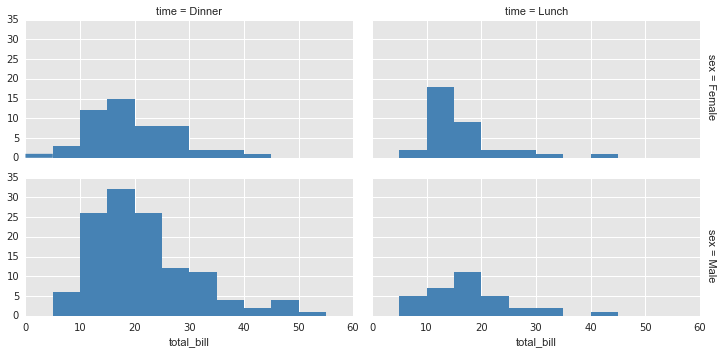

In [86]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

tips = sns.load_dataset("tips")
g = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True, size=2.5, aspect=2)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "total_bill", color="steelblue", bins=bins, lw=0);

#### Bokeh

Bokeh is a Python interactive visualization library that targets modern web browsers for presentation. Its goal is to provide elegant, concise construction of novel graphics in the style of D3.js, but also deliver this capability with high-performance interactivity over very large or streaming datasets. Bokeh can help anyone who would like to quickly and easily create interactive plots, dashboards, and data applications.

In [123]:
IFrame('http://bokeh.pydata.org/en/latest/docs/gallery.html#static-examples', 800,600)

#### Example : Stock Market Applet

In [122]:
IFrame('http://localhost:5006/bokeh/stocks/', 800,600)